In [1]:
import pandas as pd
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
import sqlite3
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi


In [3]:
#load the data into dataframe
home_loan = pd.read_csv("D:\\01_Reva\\PDGM\\02_Applied_Statistics_Mithun\\HomeLoan.csv")
home_loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
home_loan.shape
home_loan.head()
home_loan.describe()

(614, 13)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
home_loan['Credit_History'] = home_loan['Credit_History'].astype('object')
home_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    object 
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(3), int64(1), object(9)
memory usage: 62.5+ KB


In [6]:
home_loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,614.000000,614.000000,592.000000,600.00000
mean,5403.459283,1621.245798,146.412162,342.00000
std,6109.041673,2926.248369,85.587325,65.12041
min,150.000000,0.000000,9.000000,12.00000
25%,2877.500000,0.000000,100.000000,360.00000
50%,3812.500000,1188.500000,128.000000,360.00000
75%,5795.000000,2297.250000,168.000000,360.00000
max,81000.000000,41667.000000,700.000000,480.00000


In [7]:
#Check for NAN
pd.isnull(home_loan).any()
pd.isnull(home_loan).sum()

Loan_ID              False
Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
#check the count
home_loan['Gender'].value_counts()
home_loan['Married'].value_counts()
home_loan['Education'].value_counts()
home_loan['Credit_History'].value_counts()
home_loan['Property_Area'].value_counts()
home_loan['Loan_Status'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

Yes    398
No     213
Name: Married, dtype: int64

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

1.0    475
0.0     89
Name: Credit_History, dtype: int64

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

Y    422
N    192
Name: Loan_Status, dtype: int64

In [9]:
#Impute Gender
#no of males is quite high compared to female, so impute missing values in gender with Male
home_loan.Gender = home_loan.Gender.fillna('Male')

In [10]:
pd.isnull(home_loan).sum()

Loan_ID               0
Gender                0
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
#Impute Dependents
home_loan['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [12]:
#as Dependents = 0 have more no of records, so we will imput missing values of Dependents with 0
home_loan.Dependents = home_loan.Dependents.fillna('0')

In [13]:
pd.isnull(home_loan).sum()

Loan_ID               0
Gender                0
Married               3
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [14]:
#Impute Self-Employed
home_loan['Self_Employed'].value_counts()
#Self-Employed=No is more, so impute value as Self-Employed= No for blank records
home_loan.Self_Employed = home_loan.Self_Employed.fillna('No')
pd.isnull(home_loan).sum()

#Impute Married
home_loan['Married'].value_counts()

#As No of Married count is more, so impute with value = Yes
home_loan.Married = home_loan.Married.fillna('Yes')
pd.isnull(home_loan).sum()

#Impute Credit_History
home_loan['Credit_History'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

Loan_ID               0
Gender                0
Married               3
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Yes    398
No     213
Name: Married, dtype: int64

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [15]:
#As No of Credit Hisoty = 1 is more, so impute with value = 1
home_loan.Credit_History = home_loan.Credit_History.fillna('1')
#convert to categorical againa
home_loan['Credit_History'] = home_loan['Credit_History'].astype('object')
pd.isnull(home_loan).sum()
home_loan.info()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     614 non-null    object 
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(3), int64(1), object(9)
memory usage: 62.5+ KB


In [16]:
pd.isnull(home_loan).sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B2FF9B89C8>]],
      dtype=object)

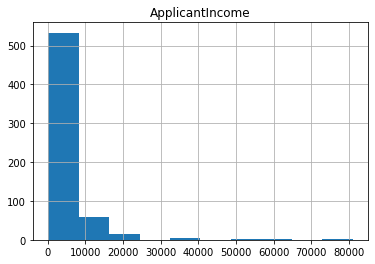

In [17]:
home_loan.hist(column='ApplicantIncome')

In [18]:
#remove the outliers related to ApplicantIncome
home_loan[home_loan['ApplicantIncome'] > 25000].Loan_ID.count()

7

In [19]:
home_loan1 = home_loan[home_loan['ApplicantIncome'] < 25000]
home_loan1.shape

(607, 13)

In [20]:
#Compare after removing outliers
home_loan.describe()
home_loan1.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,614.000000,614.000000,592.000000,600.00000
mean,5403.459283,1621.245798,146.412162,342.00000
std,6109.041673,2926.248369,85.587325,65.12041
min,150.000000,0.000000,9.000000,12.00000
25%,2877.500000,0.000000,100.000000,360.00000
50%,3812.500000,1188.500000,128.000000,360.00000
75%,5795.000000,2297.250000,168.000000,360.00000
max,81000.000000,41667.000000,700.000000,480.00000


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,607.000000,607.000000,585.000000,593.000000
mean,4894.420099,1632.116837,143.579487,342.495784
std,3473.383803,2935.906180,78.894204,64.782201
min,150.000000,0.000000,9.000000,12.000000
25%,2874.000000,0.000000,100.000000,360.000000
50%,3762.000000,1229.000000,127.000000,360.000000
75%,5705.500000,2304.000000,165.000000,360.000000
max,23803.000000,41667.000000,650.000000,480.000000


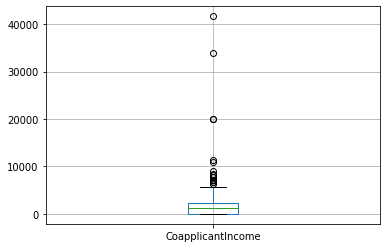

In [21]:
#Check outlier for CoapplicantIncome
home_loan1.boxplot(column='CoapplicantIncome')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B280219AC8>]],
      dtype=object)

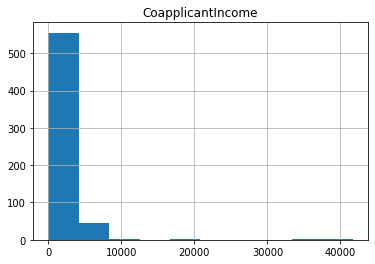

In [22]:
home_loan1.hist(column='CoapplicantIncome')

In [23]:
home_loan1[home_loan1['CoapplicantIncome']>9000].Loan_ID.count()
home_loan2 = home_loan1[home_loan1['CoapplicantIncome']<9000]

6

In [24]:
#compare after removing outliers
home_loan1.describe()
home_loan2.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,607.000000,607.000000,585.000000,593.000000
mean,4894.420099,1632.116837,143.579487,342.495784
std,3473.383803,2935.906180,78.894204,64.782201
min,150.000000,0.000000,9.000000,12.000000
25%,2874.000000,0.000000,100.000000,360.000000
50%,3762.000000,1229.000000,127.000000,360.000000
75%,5705.500000,2304.000000,165.000000,360.000000
max,23803.000000,41667.000000,650.000000,480.000000


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,601.000000,601.000000,579.000000,587.000000
mean,4902.169717,1419.172912,142.259067,342.623509
std,3464.451899,1683.676831,76.832325,64.745759
min,150.000000,0.000000,9.000000,12.000000
25%,2882.000000,0.000000,100.000000,360.000000
50%,3775.000000,1167.000000,127.000000,360.000000
75%,5708.000000,2253.000000,164.500000,360.000000
max,23803.000000,8980.000000,650.000000,480.000000


In [25]:
home_loan2[home_loan2['LoanAmount']>500].Loan_ID.count()
home_loan3 = home_loan2[home_loan2['LoanAmount']<500]

3

In [26]:
#compare after removing outliers
home_loan2.describe()
home_loan3.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,601.000000,601.000000,579.000000,587.000000
mean,4902.169717,1419.172912,142.259067,342.623509
std,3464.451899,1683.676831,76.832325,64.745759
min,150.000000,0.000000,9.000000,12.000000
25%,2882.000000,0.000000,100.000000,360.000000
50%,3775.000000,1167.000000,127.000000,360.000000
75%,5708.000000,2253.000000,164.500000,360.000000
max,23803.000000,8980.000000,650.000000,480.000000


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,575.000000,575.000000,575.000000,561.000000
mean,4782.808696,1434.175513,139.213913,342.459893
std,3211.609967,1690.538743,67.669682,65.021498
min,150.000000,0.000000,9.000000,12.000000
25%,2885.500000,0.000000,100.000000,360.000000
50%,3750.000000,1229.000000,126.000000,360.000000
75%,5672.000000,2264.500000,162.000000,360.000000
max,23803.000000,8980.000000,496.000000,480.000000


In [27]:
home_loan3['Loan_Amount_Term'].fillna((home_loan3['Loan_Amount_Term'].mean()), inplace=True)
pd.isnull(home_loan3).sum()

C:\Users\ashus\Anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [28]:
#Check if credit history has any impact in Loan Status..start
credit_loanstat = pd.crosstab(home_loan3["Credit_History"],home_loan3["Loan_Status"],margins=True)
credit_loanstat

import scipy.stats as scs
print("chi-square value, p value, expected counts")
cs1 = scs.chi2_contingency(credit_loanstat)
print(cs1)

Loan_Status,N,Y,All
Credit_History,,,
0.0,76,6,82
1.0,85,361,446
1,11,36,47
All,172,403,575


chi-square value, p value, expected counts
(180.12093437778944, 3.1982925523417046e-36, 6, array([[ 24.52869565,  57.47130435,  82.        ],
       [133.41217391, 312.58782609, 446.        ],
       [ 14.05913043,  32.94086957,  47.        ],
       [172.        , 403.        , 575.        ]]))


In [29]:
home_loan3.head()
avg_loan_gender = pd.pivot_table(home_loan3, values='LoanAmount', index='Gender',aggfunc=np.mean)
avg_loan_gender

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1,Urban,Y


,LoanAmount
Gender,
Female,120.186916
Male,143.564103


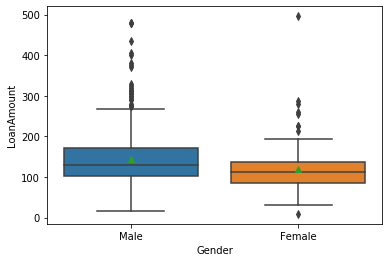

In [30]:
#Check how far apart the group means are from each other¶
sns.boxplot(x=home_loan3['Gender'], y=home_loan3['LoanAmount'],showmeans=True)

In [31]:
#Anova F-Test
model = smf.ols(formula = 'LoanAmount ~ Gender', data = home_loan3)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             LoanAmount   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     10.57
Date:                Sun, 28 Jun 2020   Prob (F-statistic):            0.00122
Time:                        21:44:21   Log-Likelihood:                -3233.6
No. Observations:                 575   AIC:                             6471.
Df Residuals:                     573   BIC:                             6480.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        120.1869      6.488     18.524      0.000     107.444     132.930
Gender[T.Male]    23.3772      7.192      3.251      0.001       9.252      37.502
==============================================================================
Omnibus:                      245.373   Durbin-Watson:                   1.919
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1192.879
Skew:                           1.881   Prob(JB):                    9.32e-260
Kurtosis:                       8.970   Cond. No.                         4.44
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
avg_loan_married = pd.pivot_table(home_loan3, values = 'LoanAmount', index = 'Married', aggfunc=np.mean)
avg_loan_married

,LoanAmount
Married,
No,125.398010
Yes,146.639037


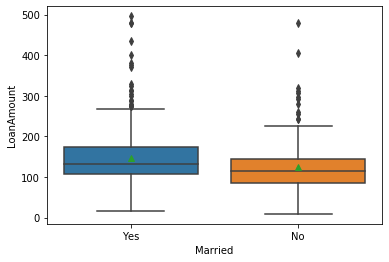

In [33]:
#visualize the data
sns.boxplot(x=home_loan3['Married'], y=home_loan3['LoanAmount'],showmeans=True)

In [40]:
#Run Anova F-Test
model = smf.ols(formula = 'LoanAmount ~ Married', data = home_loan3)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             LoanAmount   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     13.15
Date:                Sun, 28 Jun 2020   Prob (F-statistic):           0.000312
Time:                        22:59:44   Log-Likelihood:                -3232.3
No. Observations:                 575   AIC:                             6469.
Df Residuals:                     573   BIC:                             6477.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        125.3980      4.723     26.549      0.000     116.121     134.675
Married[T.Yes]    21.2410      5.857      3.627      0.000       9.738      32.744
==============================================================================
Omnibus:                      245.578   Durbin-Watson:                   1.903
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1172.473
Skew:                           1.891   Prob(JB):                    2.52e-255
Kurtosis:                       8.885   Cond. No.                         3.14
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
from sklearn import preprocessing
from sklearn.model_selection import cross_validate
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, recall_score,precision_score,accuracy_score,f1_score
from sklearn.metrics import confusion_matrix, average_precision_score, recall_score

In [57]:
home_loan3.info()
print("No of customer with Loan_Status")
home_loan3.groupby("Loan_Status").size()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 575 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            575 non-null    object 
 1   Gender             575 non-null    object 
 2   Married            575 non-null    object 
 3   Dependents         575 non-null    object 
 4   Education          575 non-null    object 
 5   Self_Employed      575 non-null    object 
 6   ApplicantIncome    575 non-null    int64  
 7   CoapplicantIncome  575 non-null    float64
 8   LoanAmount         575 non-null    float64
 9   Loan_Amount_Term   575 non-null    float64
 10  Credit_History     575 non-null    object 
 11  Property_Area      575 non-null    object 
 12  Loan_Status        575 non-null    object 
dtypes: float64(3), int64(1), object(9)
memory usage: 82.9+ KB
No of customer with Loan_Status


Loan_Status
N    172
Y    403
dtype: int64

In [58]:
#Convert Loan_Status from (Yes, No) to (0,1)
le = preprocessing.LabelEncoder()
le.fit(home_loan3['Loan_Status'])
list(le.classes_)

LabelEncoder()

['N', 'Y']

In [59]:
dfn = le.transform(home_loan3['Loan_Status'])
dfn
type(dfn)

array([0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,

numpy.ndarray

In [60]:
#create a copy of df
home_loan4 = home_loan3.copy(deep=True)
home_loan4.info()
home_loan4.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 575 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            575 non-null    object 
 1   Gender             575 non-null    object 
 2   Married            575 non-null    object 
 3   Dependents         575 non-null    object 
 4   Education          575 non-null    object 
 5   Self_Employed      575 non-null    object 
 6   ApplicantIncome    575 non-null    int64  
 7   CoapplicantIncome  575 non-null    float64
 8   LoanAmount         575 non-null    float64
 9   Loan_Amount_Term   575 non-null    float64
 10  Credit_History     575 non-null    object 
 11  Property_Area      575 non-null    object 
 12  Loan_Status        575 non-null    object 
dtypes: float64(3), int64(1), object(9)
memory usage: 62.9+ KB


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1,Urban,Y


In [61]:
#create a new dependent variable
home_loan4['Y'] = dfn
home_loan4.info()
home_loan4.columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 575 entries, 1 to 613
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            575 non-null    object 
 1   Gender             575 non-null    object 
 2   Married            575 non-null    object 
 3   Dependents         575 non-null    object 
 4   Education          575 non-null    object 
 5   Self_Employed      575 non-null    object 
 6   ApplicantIncome    575 non-null    int64  
 7   CoapplicantIncome  575 non-null    float64
 8   LoanAmount         575 non-null    float64
 9   Loan_Amount_Term   575 non-null    float64
 10  Credit_History     575 non-null    object 
 11  Property_Area      575 non-null    object 
 12  Loan_Status        575 non-null    object 
 13  Y                  575 non-null    int32  
dtypes: float64(3), int32(1), int64(1), object(9)
memory usage: 65.1+ KB


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Y'],
      dtype='object')

In [63]:
#convert from df to excel for reference
writer = pd.ExcelWriter("D:\\01_Reva\\PDGM\\02_Applied_Statistics_Mithun\\HomeLoan_temp1.xlsx")
home_loan4.to_excel(writer,'Sheet1')
writer.save()

In [64]:
#Separate Independent categorical variables for conversion into numerical
x_catg  = home_loan4.loc[:,('Gender', 'Married', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area')]
x_catg.head()
x_catg.shape

,Gender,Married,Education,Self_Employed,Credit_History,Property_Area
1,Male,Yes,Graduate,No,1,Rural
2,Male,Yes,Graduate,Yes,1,Urban
3,Male,Yes,Not Graduate,No,1,Urban
4,Male,No,Graduate,No,1,Urban
5,Male,Yes,Graduate,Yes,1,Urban


(575, 6)

In [65]:
x = pd.get_dummies(x_catg)
x.head()

,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Credit_History_0.0,Credit_History_1.0,Credit_History_1,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,0,1,0,1,1,0,1,0,0,1,0,1,0,0
2,0,1,0,1,1,0,0,1,0,1,0,0,0,1
3,0,1,0,1,0,1,1,0,0,1,0,0,0,1
4,0,1,1,0,1,0,1,0,0,1,0,0,0,1
5,0,1,0,1,1,0,0,1,0,1,0,0,0,1


In [66]:
home_loan5 = home_loan4.copy(deep=True)

In [67]:
home_loan5.Credit_History.replace((1.0, 0.0), ('Yes', 'No'), inplace=True)

In [68]:
home_loan5['Credit_History'].value_counts()

Yes    446
No      82
1       47
Name: Credit_History, dtype: int64

In [70]:
#convert from df to excel for reference
writer = pd.ExcelWriter("D:\\01_Reva\\PDGM\\02_Applied_Statistics_Mithun\\HomeLoan_temp3.xlsx")
home_loan5.to_excel(writer,'Sheet1')
writer.save()

In [71]:
#Separate Independent categorical variables for conversion into numerical
x_catg  = home_loan4.loc[:,('Gender', 'Married', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area')]
x_catg.head()
x_catg.shape

,Gender,Married,Education,Self_Employed,Credit_History,Property_Area
1,Male,Yes,Graduate,No,1,Rural
2,Male,Yes,Graduate,Yes,1,Urban
3,Male,Yes,Not Graduate,No,1,Urban
4,Male,No,Graduate,No,1,Urban
5,Male,Yes,Graduate,Yes,1,Urban


(575, 6)

In [72]:
#Convert categorical vars to dummy coding
x = pd.get_dummies(x_catg)
x.head()

,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Credit_History_0.0,Credit_History_1.0,Credit_History_1,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,0,1,0,1,1,0,1,0,0,1,0,1,0,0
2,0,1,0,1,1,0,0,1,0,1,0,0,0,1
3,0,1,0,1,0,1,1,0,0,1,0,0,0,1
4,0,1,1,0,1,0,1,0,0,1,0,0,0,1
5,0,1,0,1,1,0,0,1,0,1,0,0,0,1


In [73]:
#create a copy of df
home_loan5 = home_loan4.copy(deep=True)

In [74]:
home_loan5.Credit_History.replace((1.0, 0.0), ('Yes', 'No'), inplace=True)
home_loan5['Credit_History'].value_counts()

Yes    446
No      82
1       47
Name: Credit_History, dtype: int64

In [75]:
#convert from df to excel for reference
writer = pd.ExcelWriter("D:\\01_Reva\\PDGM\\02_Applied_Statistics_Mithun\\HomeLoan_temp3.xlsx")
home_loan5.to_excel(writer,'Sheet1')
writer.save()

In [76]:
#for some reason, 1 is stored as string..make the changes accordingly
home_loan5.Credit_History.replace(('1'), ('Yes'), inplace=True)
home_loan5['Credit_History'].value_counts()

Yes    493
No      82
Name: Credit_History, dtype: int64

In [77]:
#Separate Independent categorical variables for conversion into numerical
x_catg  = home_loan5.loc[:,('Gender', 'Married', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area')]
x_catg.head()
x_catg.shape

,Gender,Married,Education,Self_Employed,Credit_History,Property_Area
1,Male,Yes,Graduate,No,Yes,Rural
2,Male,Yes,Graduate,Yes,Yes,Urban
3,Male,Yes,Not Graduate,No,Yes,Urban
4,Male,No,Graduate,No,Yes,Urban
5,Male,Yes,Graduate,Yes,Yes,Urban


(575, 6)

In [78]:
#Convert categorical vars to dummy coding
x_num1 = pd.get_dummies(x_catg)
x_num1.head()

#Separate Independent numerical variables
#x_num = home_loan5.loc[:,('ApplicantIncome', 'CoapplicantIncome')]
#x_num.head()
x = x_num1

#convert dependent variable
y = home_loan5['Y']
y.head()
type(y)


#Create train and test data
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.25, random_state = 1)
train_x.shape[0]
test_x.shape[0]
train_y.shape[0]
test_y.shape[0]
type(train_x)

,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Credit_History_No,Credit_History_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,0,1,0,1,1,0,1,0,0,1,1,0,0
2,0,1,0,1,1,0,0,1,0,1,0,0,1
3,0,1,0,1,0,1,1,0,0,1,0,0,1
4,0,1,1,0,1,0,1,0,0,1,0,0,1
5,0,1,0,1,1,0,0,1,0,1,0,0,1


1    0
2    1
3    1
4    1
5    1
Name: Y, dtype: int32

pandas.core.series.Series

431

144

431

144

pandas.core.frame.DataFrame

In [79]:
#Build logistic regression model
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()

In [80]:
log.fit(train_x, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [81]:
coeff = pd.concat([pd.DataFrame(x.columns), pd.DataFrame(np.transpose(log.coef_))], axis = 1)
coeff.columns = ("Variable", "Coeff")
coeff.sort_values('Variable', ascending = True)

,Variable,Coeff
8,Credit_History_No,-1.844966
9,Credit_History_Yes,1.844969
4,Education_Graduate,0.120720
5,Education_Not Graduate,-0.120717
0,Gender_Female,0.006330
1,Gender_Male,-0.006327
2,Married_No,-0.303243
3,Married_Yes,0.303246
10,Property_Area_Rural,-0.530490
11,Property_Area_Semiurban,0.674826


In [84]:
#Generate Model Diagnostics
pred_y = log.predict(test_x)
print("Positive Cases in test data", test_y[test_y == 1].shape[0])
print("Negative Cases in test data", test_y[test_y == 0].shape[0])

Positive Cases in test data 103
Negative Cases in test data 41


In [86]:
#Precision and Recall
print("Accuracy Score")
print(metrics.accuracy_score(test_y, pred_y))

print("precision/recalls metrics")
print(metrics.classification_report(test_y, pred_y))

Accuracy Score
0.8263888888888888
precision/recalls metrics
              precision    recall  f1-score   support

           0       0.94      0.41      0.58        41
           1       0.81      0.99      0.89       103

    accuracy                           0.83       144
   macro avg       0.88      0.70      0.73       144
weighted avg       0.85      0.83      0.80       144



In [87]:
print("AUC")
auc = metrics.roc_auc_score(test_y, pred_y)
auc

AUC


0.7024627042386928

0.7024627042386928

Text(0.5, 1.0, 'ROCR Chart')

(0, 1)

(0, 1)

Text(0.5, 0, 'True Positive Rate')

Text(0, 0.5, 'False Positive Rate')

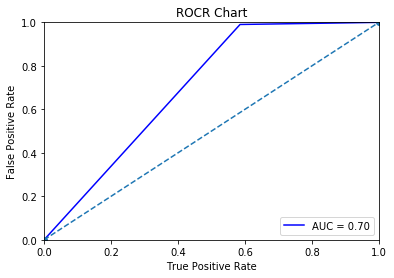

In [88]:
#ROC Chart
#false_positive_rate, true_positive_rate, threshold
fpr, tpr, th = roc_curve(test_y, pred_y)
roc_auc = metrics.auc(fpr, tpr)
roc_auc
plt.title('ROCR Chart')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'o--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel("True Positive Rate")
plt.ylabel("False Positive Rate")
plt.show()

Confusion matrix


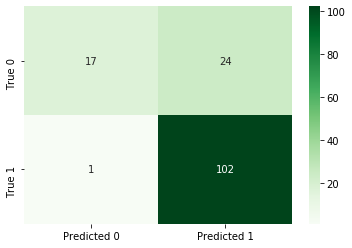

In [89]:
#confusion matrix
import matplotlib.pyplot as plt
print("Confusion matrix")
cf = metrics.confusion_matrix(test_y, pred_y)
lbl1 = ["Predicted 0", "Predicted 1"]
lbl2 = ["True 0", "True 1"]
sns.heatmap(cf, annot = True, cmap = "Greens", fmt = "d", xticklabels=lbl1, yticklabels=lbl2)
plt.show();